In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import cv2 as cv
import imutils

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datagen.imgen.transforms import functional as F
from datagen.imgen.transforms import effects as E
from datagen.imgen import transforms as T

matplotlib.rcParams['figure.figsize'] = (12,12)

In [3]:
base_path = Path('../data/')
base_impath = str(base_path.joinpath('idcard/base2.png'))
back_impath = str(base_path.joinpath('background/img1.jpg'))

In [4]:
base_image = cv.imread(base_impath, cv.IMREAD_UNCHANGED)
back_image = cv.imread(back_impath, cv.IMREAD_COLOR)

base_image = cv.cvtColor(base_image, cv.COLOR_BGR2RGB)
back_image = cv.cvtColor(back_image, cv.COLOR_BGR2RGB)

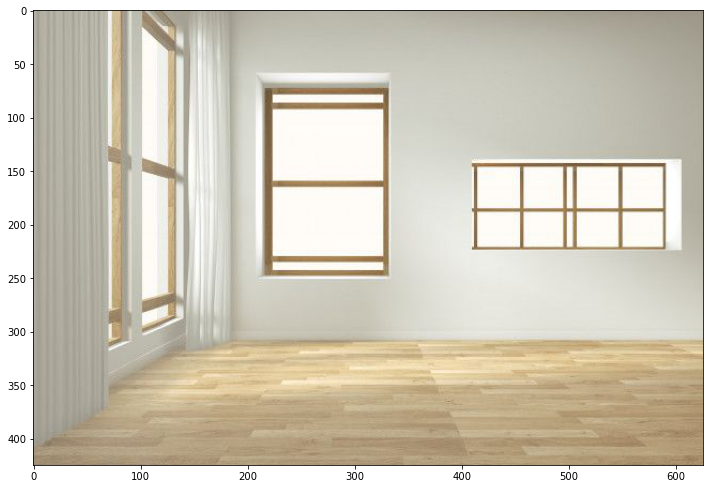

In [5]:
plt.imshow(back_image, cmap='gray')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


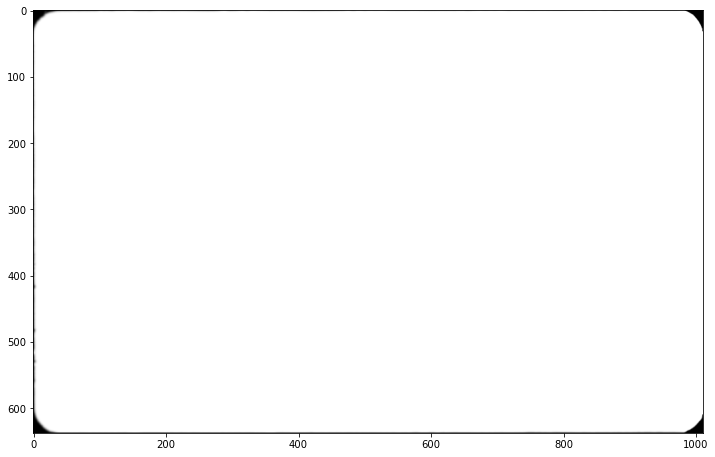

In [6]:
from datagen.imgen.ops import image_ops

idcard_path ='/workspace/serverfs/data/idcard/base/3101020907676543_40299.png'
idcard_image = cv.imread(idcard_path, cv.IMREAD_UNCHANGED)
# print(idcard_image[-1])
idcard_image_segment = image_ops.image_selection(idcard_image, val=0)
# sH, sW = seg_size = idcard_image_segment.shape[:2]
# bH,eH = int(sH*0.02), sH-int(sH*0.02), 
# bW,eW = int(sW*0.015), sW-int(sW*0.015)
# idcard_image_segment[bH:eH,bW:eW] = idcard_image_segment.max()

# segment_canvas = image_ops.create_canvas(back_size)
# segment_image = image_ops.join2image_withcoords(idcard_image_segment, segment_canvas, xybox)
alpha_img = cv.split(idcard_image)[-1].astype(np.uint8)
print(alpha_img[100:200, 100:200])
plt.imshow(alpha_img, cmap='gray')

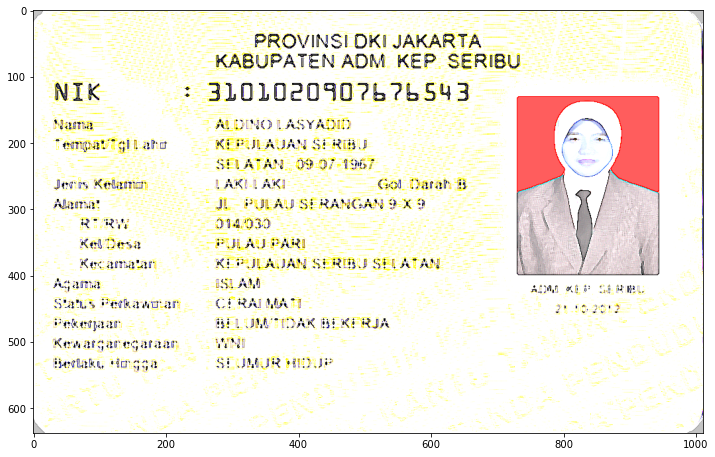

In [11]:
basic_effect = T.ComposeRandomChoice([
#     T.Darken()
    T.RandomGamma(gamma_range=(0.5, 2.5), p=1),
    T.RandomContrast(level_range=(0, 20), p=1),
    T.RandomBrightness(level_range=(20, 50), p=1),
#     T.RandomHueShifting(shift_range=(1, 100), p=1),
#     T.RandomChannelShuffle(p=1),
    T.RandomSharpen(p=1),
#     T.RandomGaussionBlur(sigma_range=(1.0, 5.0), p=1),
    T.RandomMedianBlur(p=1),
#     T.RandomMorphDilation(p=1),
#     T.RandomMorphOpening(p=1),
#     T.RandomMorphClosing(p=1)
], k=5)

image_effect = basic_effect(idcard_image)
plt.imshow(image_effect, cmap='gray')

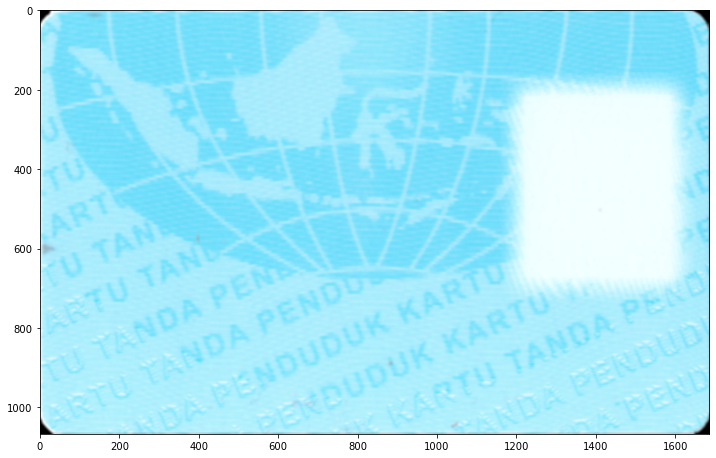

In [12]:
advance_effect = T.ComposeRandomChoice([
    T.RandomAddSunFlares(p=1),
    T.RandomAddShadow(p=1),
    T.RandomAddSnow(p=1),
#     T.RandomAddRain(p=1),
    T.RandomAddSpeed(p=1),
    T.RandomAddFog(p=1),
    T.RandomAddGravel(p=1),
], k=1)

image_adv_effect = advance_effect(base_image)
plt.imshow(image_adv_effect, cmap='gray')

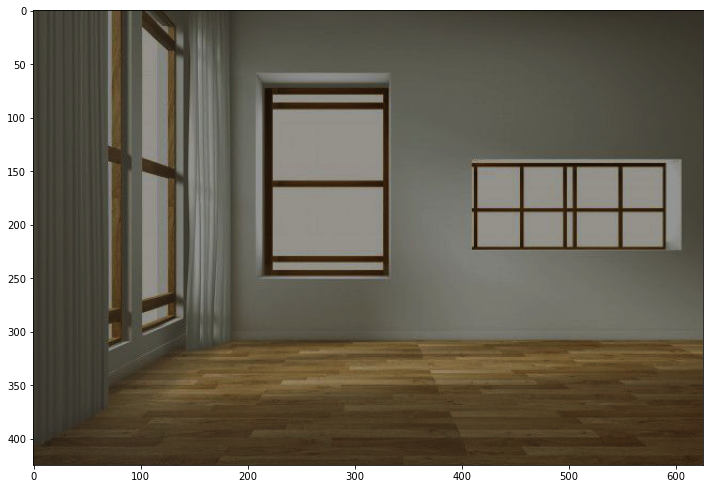

In [31]:
darken = T.Darken()
img_darken = darken(back_image)
plt.imshow(img_darken, cmap='gray')

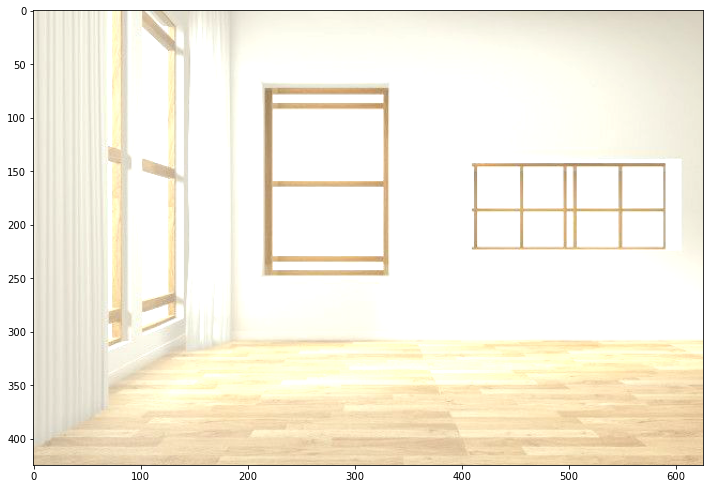

In [39]:
lighten = T.Lighten()
img_lighten = lighten(back_image)
plt.imshow(img_lighten, cmap='gray')

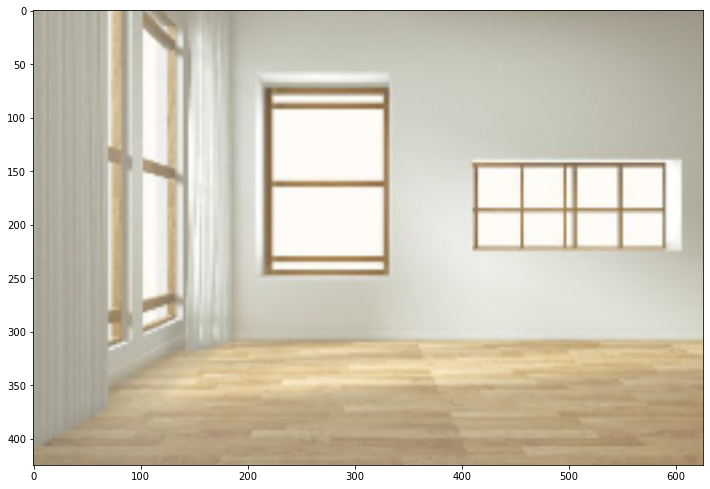

In [43]:
lo_res = T.ToLoRes(factor=0.4)
img_lo_res = lo_res(back_image)
plt.imshow(img_lo_res, cmap='gray')

0.4843362943903874

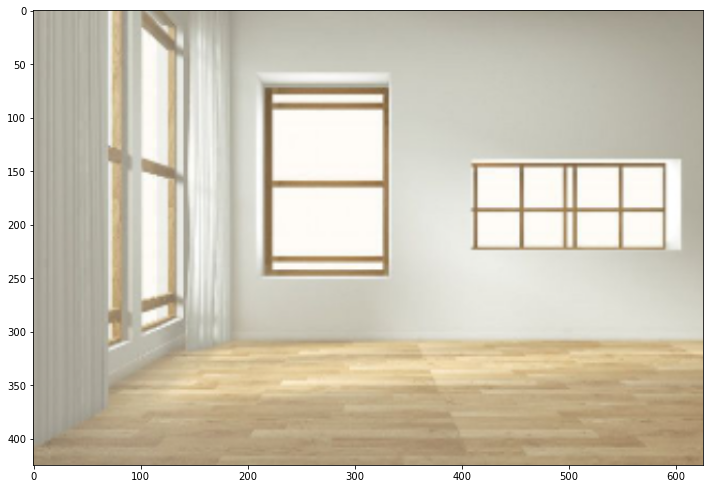

In [67]:
rand_lo_res = T.RandomLoRes()
img_lo_res = rand_lo_res(back_image)
plt.imshow(img_lo_res, cmap='gray')
rand_lo_res.factor

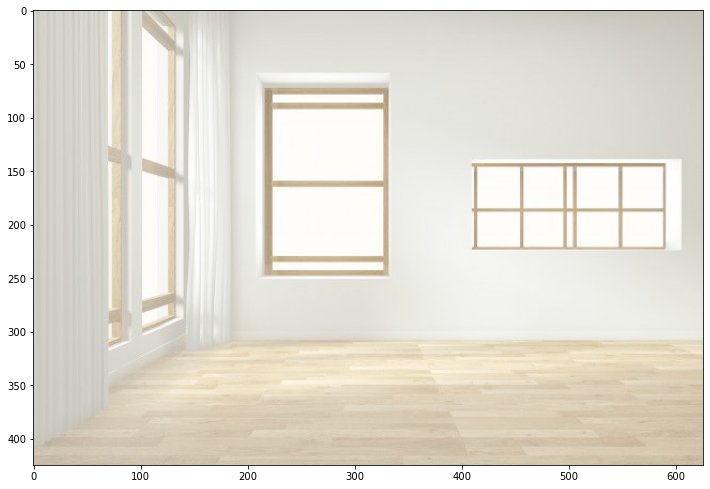

In [64]:
random_gamma = T.RandomGamma(gamma_range=(0.5, 2.5), p=1)
img_gamma = random_gamma(back_image)
plt.imshow(img_gamma, cmap='gray')

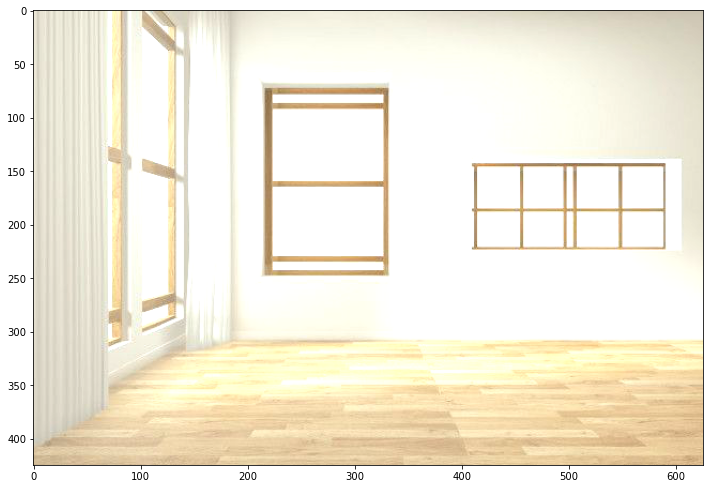

In [15]:
random_contrast = T.RandomContrast(level_range=(0, 20), p=1)
img_contrast = random_contrast(back_image)
plt.imshow(img_contrast, cmap='gray')

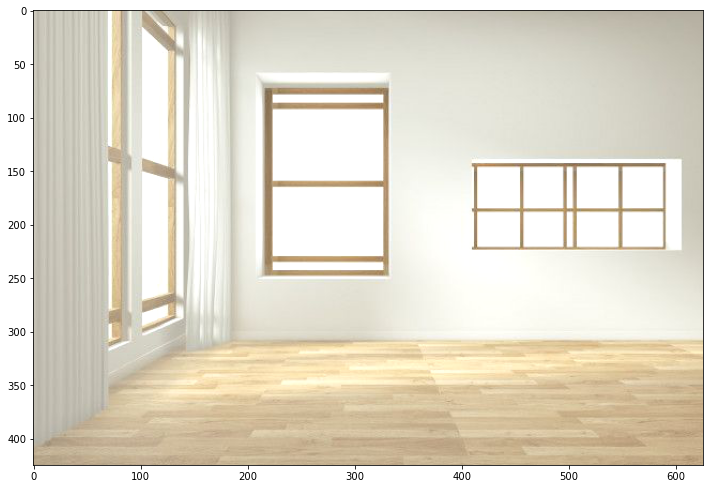

In [16]:
random_brightness = T.RandomBrightness(level_range=(20, 50), p=1)
img_brightness = random_brightness(back_image)
plt.imshow(img_brightness, cmap='gray')

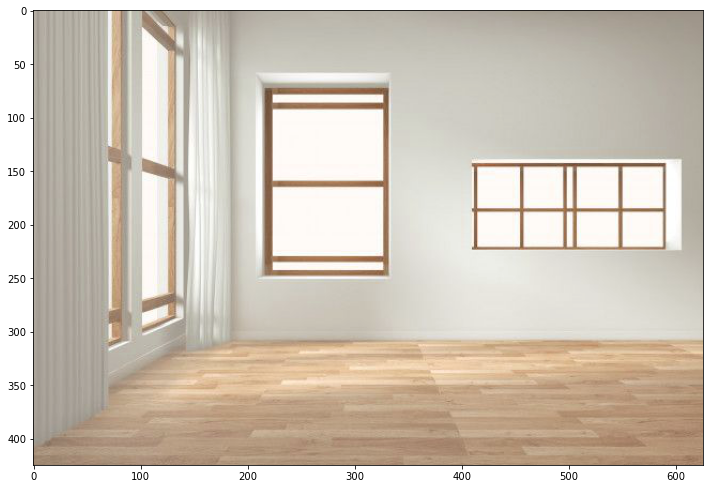

In [69]:
random_hue = T.RandomHueShifting(shift_range=(1, 100), p=1)
img_hue = random_hue(back_image)
plt.imshow(img_hue, cmap='gray')

In [72]:
random_chanshuffle = T.RandomChannelShuffle(p=1)
img_chanshuffle = random_chanshuffle(back_image)
plt.imshow(img_chanshuffle, cmap='gray')

TypeError: object of type 'int' has no len()

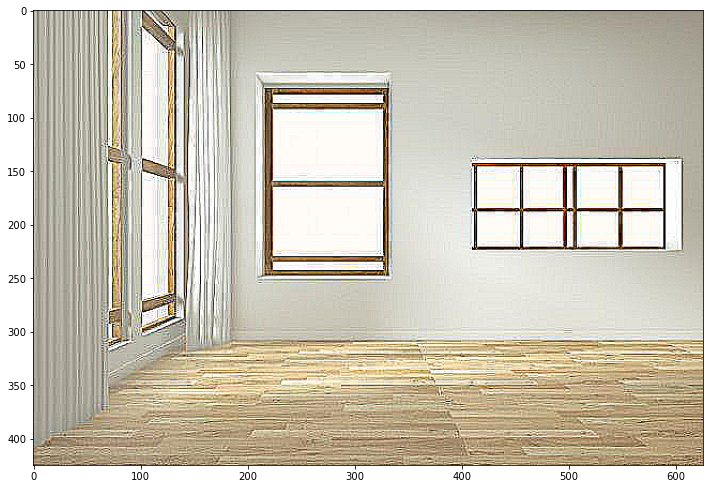

In [77]:
random_sharpen = T.RandomSharpen(p=1)
img_sharpen = random_sharpen(back_image)
plt.imshow(img_sharpen, cmap='gray')

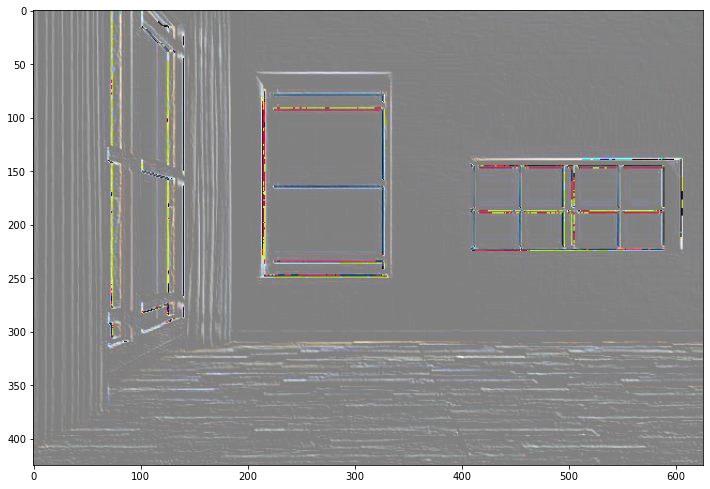

In [78]:
random_emboss = T.RandomEmboss(p=1)
img_emboss = random_emboss(back_image)
plt.imshow(img_emboss, cmap='gray')

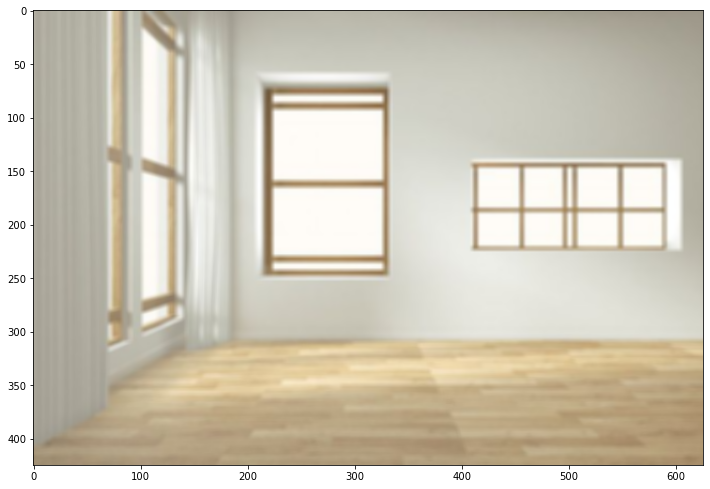

In [79]:
random_gaussian = T.RandomGaussionBlur(sigma_range=(1.0, 5.0), p=1)
img_gaussian = random_gaussian(back_image)
plt.imshow(img_gaussian, cmap='gray')

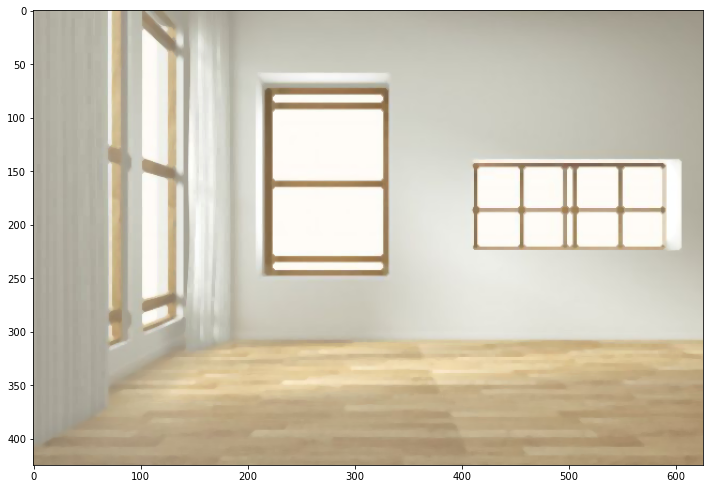

In [80]:
random_median = T.RandomMedianBlur(p=1)
img_median = random_median(back_image)
plt.imshow(img_median, cmap='gray')

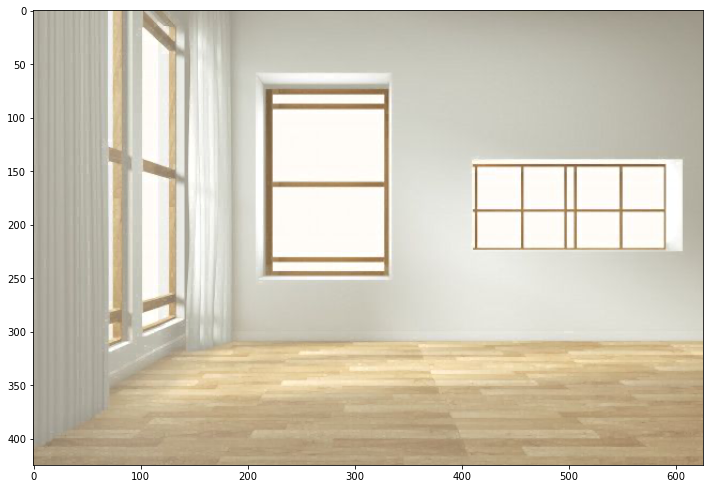

In [81]:
random_dilation = T.RandomMorphDilation(p=1)
img_dilation = random_dilation(back_image)
plt.imshow(img_dilation, cmap='gray')

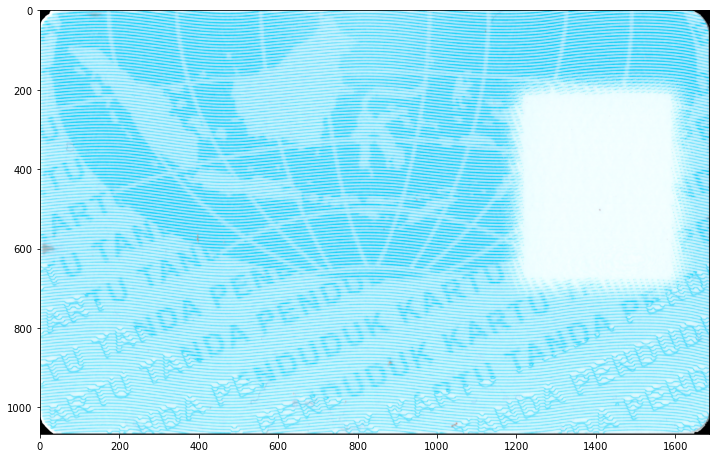

In [82]:
random_opening = T.RandomMorphOpening(p=1)
img_opening = random_opening(base_image)
plt.imshow(img_opening, cmap='gray')

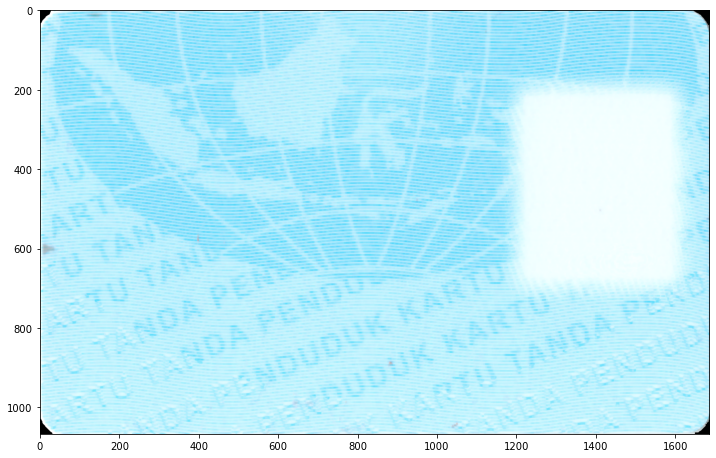

In [83]:
random_closing = T.RandomMorphClosing(p=1)
img_closing = random_closing(base_image)
plt.imshow(img_closing, cmap='gray')

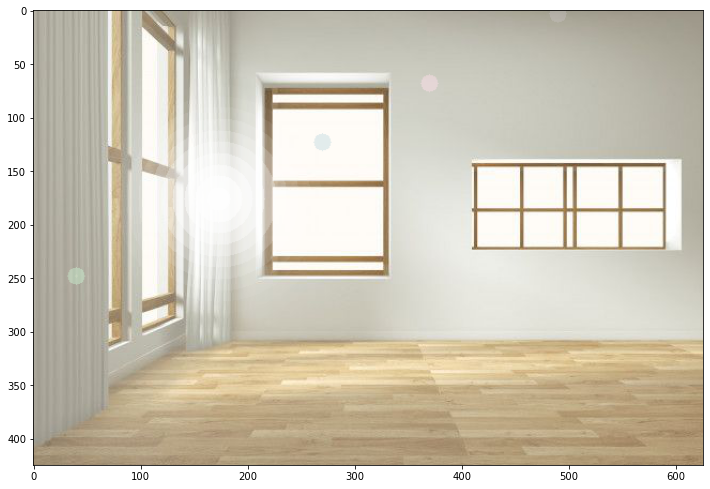

In [84]:
random_sun_flares = T.RandomAddSunFlares(p=1)
img_sun_flares = random_sun_flares(back_image)
plt.imshow(img_sun_flares, cmap='gray')

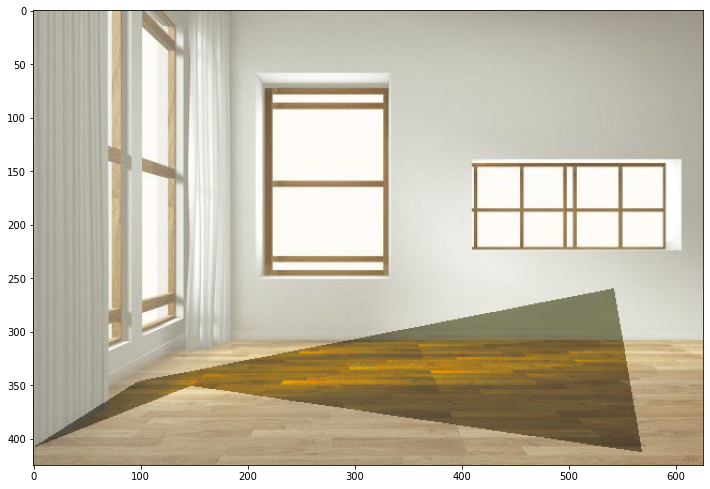

In [78]:
random_shadow = T.RandomAddShadow(p=1)
img_shadow = random_shadow(back_image)
plt.imshow(img_shadow, cmap='gray')

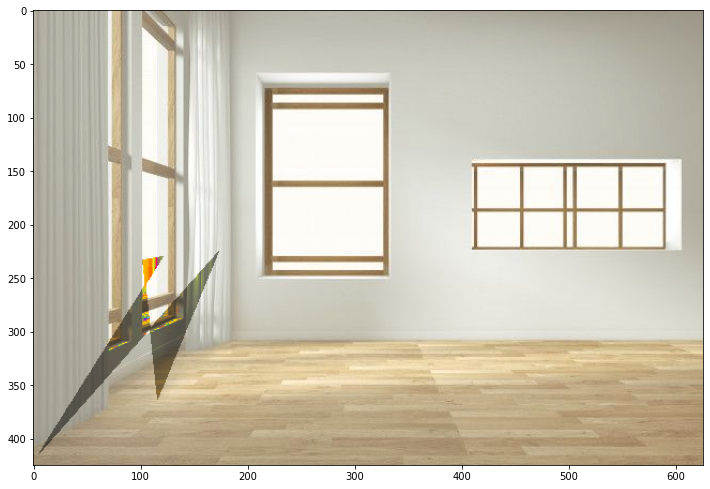

In [79]:
random_shadow = T.RandomAddShadow(p=1)
img_shadow = random_shadow(back_image)
plt.imshow(img_shadow, cmap='gray')

In [199]:
import random

alist = ['rand', 'bee', 'apple']
random.sample(alist, k=2)

['bee', 'apple']